# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [7]:
# ============================================
# CELL 2 — IMPORT LIBRARY
# ============================================

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

import joblib

print("📌 Library berhasil diimport.")

📌 Library berhasil diimport.


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [8]:
# Ganti nama siswa & dataset sesuai kebutuhan
NAMA_SISWA = "Nama-siswa"
NAMA_DATASET = "namadataset"   # tanpa ekstensi
RAW_DIR = f"/content/drive/MyDrive/Eksperimen_SML_{NAMA_SISWA}/namadataset_raw"
PREP_DIR = f"/content/drive/MyDrive/Eksperimen_SML_{NAMA_SISWA}/preprocessing/namadataset_preprocessing"

os.makedirs(RAW_DIR, exist_ok=True)
os.makedirs(PREP_DIR, exist_ok=True)

# contoh lokasi dataset raw (Jika sudah di repo lokal pada Colab workspace ubah path)
raw_csv_path = os.path.join(RAW_DIR, f"{NAMA_DATASET}.csv")
print("raw_csv_path:", raw_csv_path)

# Jika Anda meng-upload langsung di /content, ubah sesuai tempat file diupload.

# Jika file ada, load. Jika tidak ada, tampilkan contoh pembuatan kecil.
if os.path.exists(raw_csv_path):
    df = pd.read_csv(raw_csv_path)
    print("Loaded dataset:", raw_csv_path)
else:
    # buat contoh dataset kecil (placeholder) agar eksperimen tetap jalan
    print("File tidak ditemukan di", raw_csv_path, "- membuat contoh dataset demo")
    df = pd.DataFrame({
        "age":[25, 30, np.nan, 45, 33, 200],
        "gender":["M","F","F","M",None,"F"],
        "income":[5000,7000,6000,None,6500,7000],
        "target":[0,1,0,1,0,1]
    })
df.head()

raw_csv_path: /content/drive/MyDrive/Eksperimen_SML_Nama-siswa/namadataset_raw/namadataset.csv
File tidak ditemukan di /content/drive/MyDrive/Eksperimen_SML_Nama-siswa/namadataset_raw/namadataset.csv - membuat contoh dataset demo


,age,gender,income,target
0,25.0,M,5000.0,0
1,30.0,F,7000.0,1
2,NaN,F,6000.0,0
3,45.0,M,NaN,1
4,33.0,None,6500.0,0


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

📌 Jumlah baris dan kolom: (6, 4)

📌 Missing Values:
age       1
gender    1
income    1
target    0
dtype: int64

📌 Statistik Deskriptif:


,age,gender,income,target
count,5.000000,5,5.000000,6.000000
unique,NaN,2,NaN,NaN
top,NaN,F,NaN,NaN
freq,NaN,3,NaN,NaN
mean,66.600000,NaN,6300.000000,0.500000
std,74.935305,NaN,836.660027,0.547723
min,25.000000,NaN,5000.000000,0.000000
25%,30.000000,NaN,6000.000000,0.000000
50%,33.000000,NaN,6500.000000,0.500000
75%,45.000000,NaN,7000.000000,1.000000


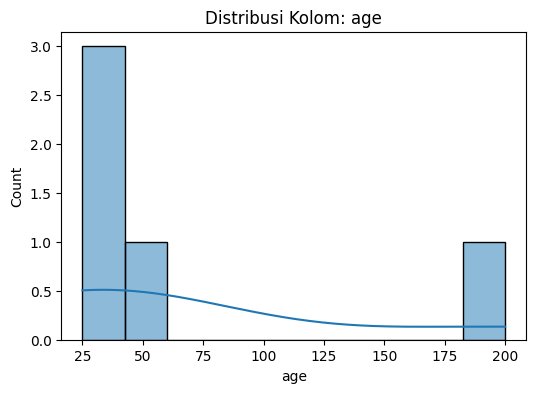

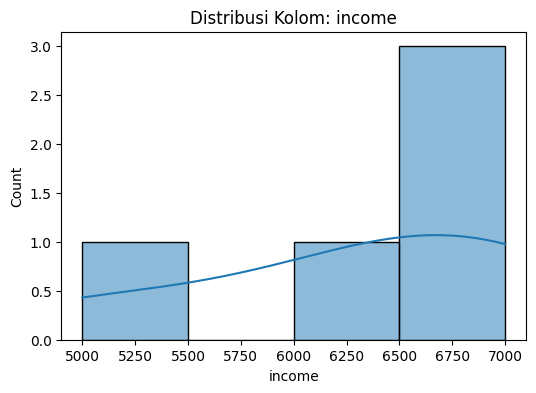

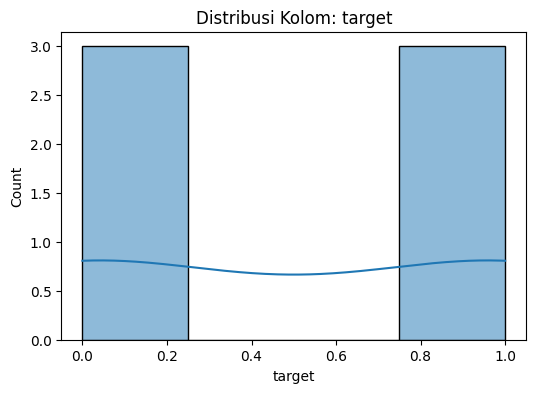

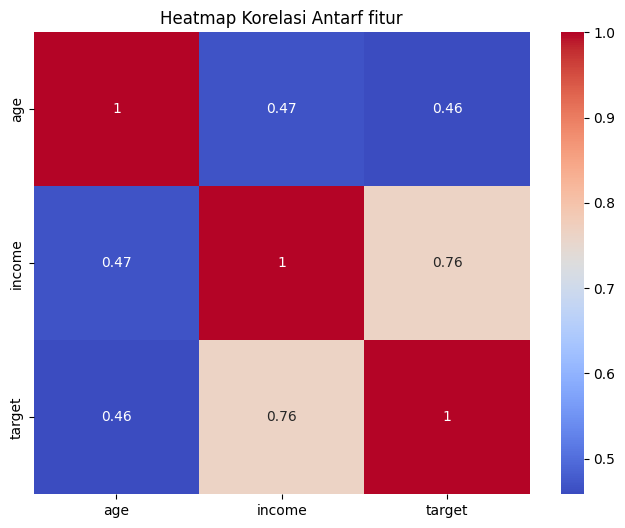

📌 Proses EDA selesai.


In [9]:
# ============================================
# CELL 4 — EXPLORATORY DATA ANALYSIS (EDA)
# ============================================

print("📌 Jumlah baris dan kolom:", df.shape)

# Mengecek missing values
print("\n📌 Missing Values:")
print(df.isnull().sum())

# Statistik deskriptif
print("\n📌 Statistik Deskriptif:")
display(df.describe(include='all'))

# Distribusi numerik
numeric_cols = df.select_dtypes(include=np.number).columns

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribusi Kolom: {col}")
    plt.show()

# Korelasi
if len(numeric_cols) >= 2:
    plt.figure(figsize=(8,6))
    sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
    plt.title("Heatmap Korelasi Antarf fitur")
    plt.show()

print("📌 Proses EDA selesai.")

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [10]:
# ============================================
# CELL 5 — DATA PREPROCESSING
# ============================================

df_clean = df.copy()

# ---- 1. Tangani missing values
df_clean = df_clean.dropna()  # atau bisa gunakan fillna

# ---- 2. Hapus duplikasi
df_clean = df_clean.drop_duplicates()

# ---- 3. Encode kolom kategorikal
categorical_cols = df_clean.select_dtypes(include="object").columns

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_clean[col] = le.fit_transform(df_clean[col])
    label_encoders[col] = le

# ---- 4. Standarisasi fitur numerik
numeric_cols = df_clean.select_dtypes(include=np.number).columns

scaler = StandardScaler()
df_clean[numeric_cols] = scaler.fit_transform(df_clean[numeric_cols])

# ---- 5. Split train-test
X = df_clean.drop(columns=[df_clean.columns[0]])  # contoh: kolom pertama dianggap target, sesuaikan!
y = df_clean[df_clean.columns[0]]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("📌 Preprocessing selesai.")
print("X_train:", X_train.shape)
print("X_test :", X_test.shape)

📌 Preprocessing selesai.
X_train: (2, 3)
X_test : (1, 3)


skil 3

In [11]:
%%writefile automate_Nama_siswa.py
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

def load_dataset(path):
    df = pd.read_csv(path)
    return df

def clean_data(df):
    df = df.dropna()
    df = df.drop_duplicates()
    return df

def encode_categorical(df):
    categorical_cols = df.select_dtypes(include="object").columns
    encoders = {}
    for col in categorical_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        encoders[col] = le
    return df, encoders

def scale_numeric(df):
    numeric_cols = df.select_dtypes(include=np.number).columns
    scaler = StandardScaler()
    df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
    return df, scaler

def split_data(df, target_column, test_size=0.2):
    X = df.drop(columns=[target_column])
    y = df[target_column]
    return train_test_split(X, y, test_size=test_size, random_state=42)

def preprocess_pipeline(path, target_column):
    df = load_dataset(path)
    df_clean = clean_data(df)
    df_clean, encoders = encode_categorical(df_clean)
    df_clean, scaler = scale_numeric(df_clean)
    X_train, X_test, y_train, y_test = split_data(df_clean, target_column)
    return df_clean, X_train, X_test, y_train, y_test, encoders, scaler

from automate_Nama_siswa import preprocess_pipeline

PATH = "/content/data_siswa.csv"
TARGET = "target"

df_clean, X_train, X_test, y_train, y_test, encoders, scaler = preprocess_pipeline(
    PATH,
    TARGET
)

print("🚀 Preprocessing selesai!")
print("Shape data bersih:", df_clean.shape)
print("Train:", X_train.shape)
print("Test :", X_test.shape)


Writing automate_Nama_siswa.py
